# Online Shopping Intent - EDA

**Tony Ghabour**
___

# Initial Setup

## Dependencies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import pandas.util.testing as tm
from time import strptime

%matplotlib inline 

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [2]:
import warnings
warnings.filterwarnings("ignore")

## Functions

In [3]:
def plot_prevelance(column):
    
    x = online_raw[column].unique()

    y_true = online_raw.groupby([column], sort = True).Revenue.sum().reset_index().sort_values('Revenue', ascending=False).Revenue
    y_false = online_raw.groupby([column], sort = True).Revenue.count().reset_index().sort_values('Revenue', ascending=False).Revenue - y_true

    plt.figure(figsize = [10, 5])
    p1 = plt.bar(x, y_false, bottom = y_true)
    p2 = plt.bar(x, y_true)

    plt.ylabel('Count')
    plt.xticks(x)
    plt.title(f"Prevelance of Purchase by '{column}'")
    plt.legend((p1[0], p2[0]), ('Purchase', 'No Purchase'))

    plt.show()

## Import Raw Data

In [4]:
online_raw = pd.read_csv('../data/raw/online_shoppers_intention.csv')

# Inspection & EDA

**Inspect DataFrame for nulls and data types.**

In [5]:
online_df = online_raw.copy()
online_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

**Observations:**
* No missing data.
* Data types appear to be appropriate/consistent with the information applicable to each element.

**Inspect unique values in each field and confirm there are no obviously erroneous entries.**

In [6]:
for idx, column in enumerate(online_df.columns):
        print(online_df.columns[idx], online_df[column].unique())

Administrative [ 0  1  2  4 12  3 10  6  5  9  8 16 13 11  7 18 14 17 19 15 24 22 21 20
 23 27 26]
Administrative_Duration [  0.         53.         64.6       ... 167.9107143 305.125
 150.3571429]
Informational [ 0  1  2  4 16  5  3 14  6 12  7  9 10  8 11 24 13]
Informational_Duration [  0.   120.    16.   ... 547.75 368.25 211.25]
ProductRelated [  1   2  10  19   0   3  16   7   6  23  13  20   8   5  32   4  45  14
  52   9  46  15  22  11  12  36  42  27  90  18  38  17 128  25  30  21
  51  26  28  31  24  50  96  49  68  98  67  55  35  37  29  34  71  63
  87  40  33  54  64  75  39 111  81  61  47  44  88 149  41  79  66  43
 258  80  62  83 173  48  58  57  56  69  82  59 109 287  53  84  78 137
 113  89  65  60 104 129  77  74  93  76  72 194 140 110 132 115  73 328
 160  86 150  95 130 151 117 124 127 125 116 105  92 157 154 220 187 112
 131 159  94 204 142 206 102 313 145  85  97 198 181 126 106 101 108 119
  70 122  91 276 100 291 114 172 217 141 133 156 136 180 135 195 

**Observations:**
* Certain fields are encoded/censored >> unable to interpret real-world meaning of "Browser = 3", for instance. Original data source provides no mapping.
* All months given in three-letter abbreviation, except for "June"...may need to transform to make consistent, easier to work with.

In [7]:
online_df.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb                 2   
2         0.20       0.20         0.0         0.0   Feb                 4   
3         0.05       0.14         0.0         0.0   Feb                 3   
4         0.02       0.05         0.0         0.0   Feb                 3   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0        1       1            1  Returning_Visitor    False    False  
1        2       1            2  Returning_Visitor    False    False  
2        1       9            3  Returning_Visitor    False    False  
3        2       2            4  Returning_Visitor    False    False  
4        3       1            4  Returning_Visitor     True    False

In [8]:
online_df.describe()

Administrative  Administrative_Duration  Informational  \
count    12330.000000             12330.000000   12330.000000   
mean         2.315166                80.818611       0.503569   
std          3.321784               176.779107       1.270156   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 7.500000       0.000000   
75%          4.000000                93.256250       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            12330.000000    12330.000000             12330.000000   
mean                34.472398       31.731468              1194.746220   
std                140.749294       44.475503              1913.669288   
min                  0.000000        0.000000                 0.000000   
25%                  0.000000        7.000000               184.137500   
50%                  0.000000       18.000000               598.936905   
75%                  0.000000       38.000000              1464.157213   
max               2549.375000      705.000000             63973.522230   

        BounceRates     ExitRates    PageValues    SpecialDay  \
count  12330.000000  12330.000000  12330.000000  12330.000000   
mean       0.022191      0.043073      5.889258      0.061427   
std        0.048488      0.048597     18.568437      0.198917   
min        0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.014286      0.000000      0.000000   
50%        0.003112      0.025156      0.000000      0.000000   
75%        0.016813      0.050000      0.000000      0.000000   
max        0.200000      0.200000    361.763742      1.000000   

       OperatingSystems       Browser        Region   TrafficType  
count      12330.000000  12330.000000  12330.000000  12330.000000  
mean           2.124006      2.357097      3.147364      4.069586  
std            0.911325      1.717277      2.401591      4.025169  
min            1.000000      1.000000      1.000000      1.000000  
25%            2.000000      2.000000      1.000000      2.000000  
50%            2.000000      2.000000      3.000000      2.000000  
75%            3.000000      2.000000      4.000000      4.000000  
max            8.000000     13.000000      9.000000     20.000000

## Pair Plot

**Basic transformations to prepare data for pair-plotting.**

In [9]:
# Convert boolean types to integer types
online_df.Weekend = online_df.Weekend.astype(int)
online_df.Revenue = online_df.Revenue.astype(int)

# Encode VisitorType string categories to integer categories 
online_df.VisitorType = pd.Categorical(online_df.VisitorType)
online_df.VisitorType = online_df.VisitorType.cat.codes

# Convert Month to numerical values to incorporate as potential model feature
online_df.Month = online_df.Month.replace('June', "Jun")
online_df.Month = online_df.Month.apply(lambda x: strptime(x,'%b').tm_mon)

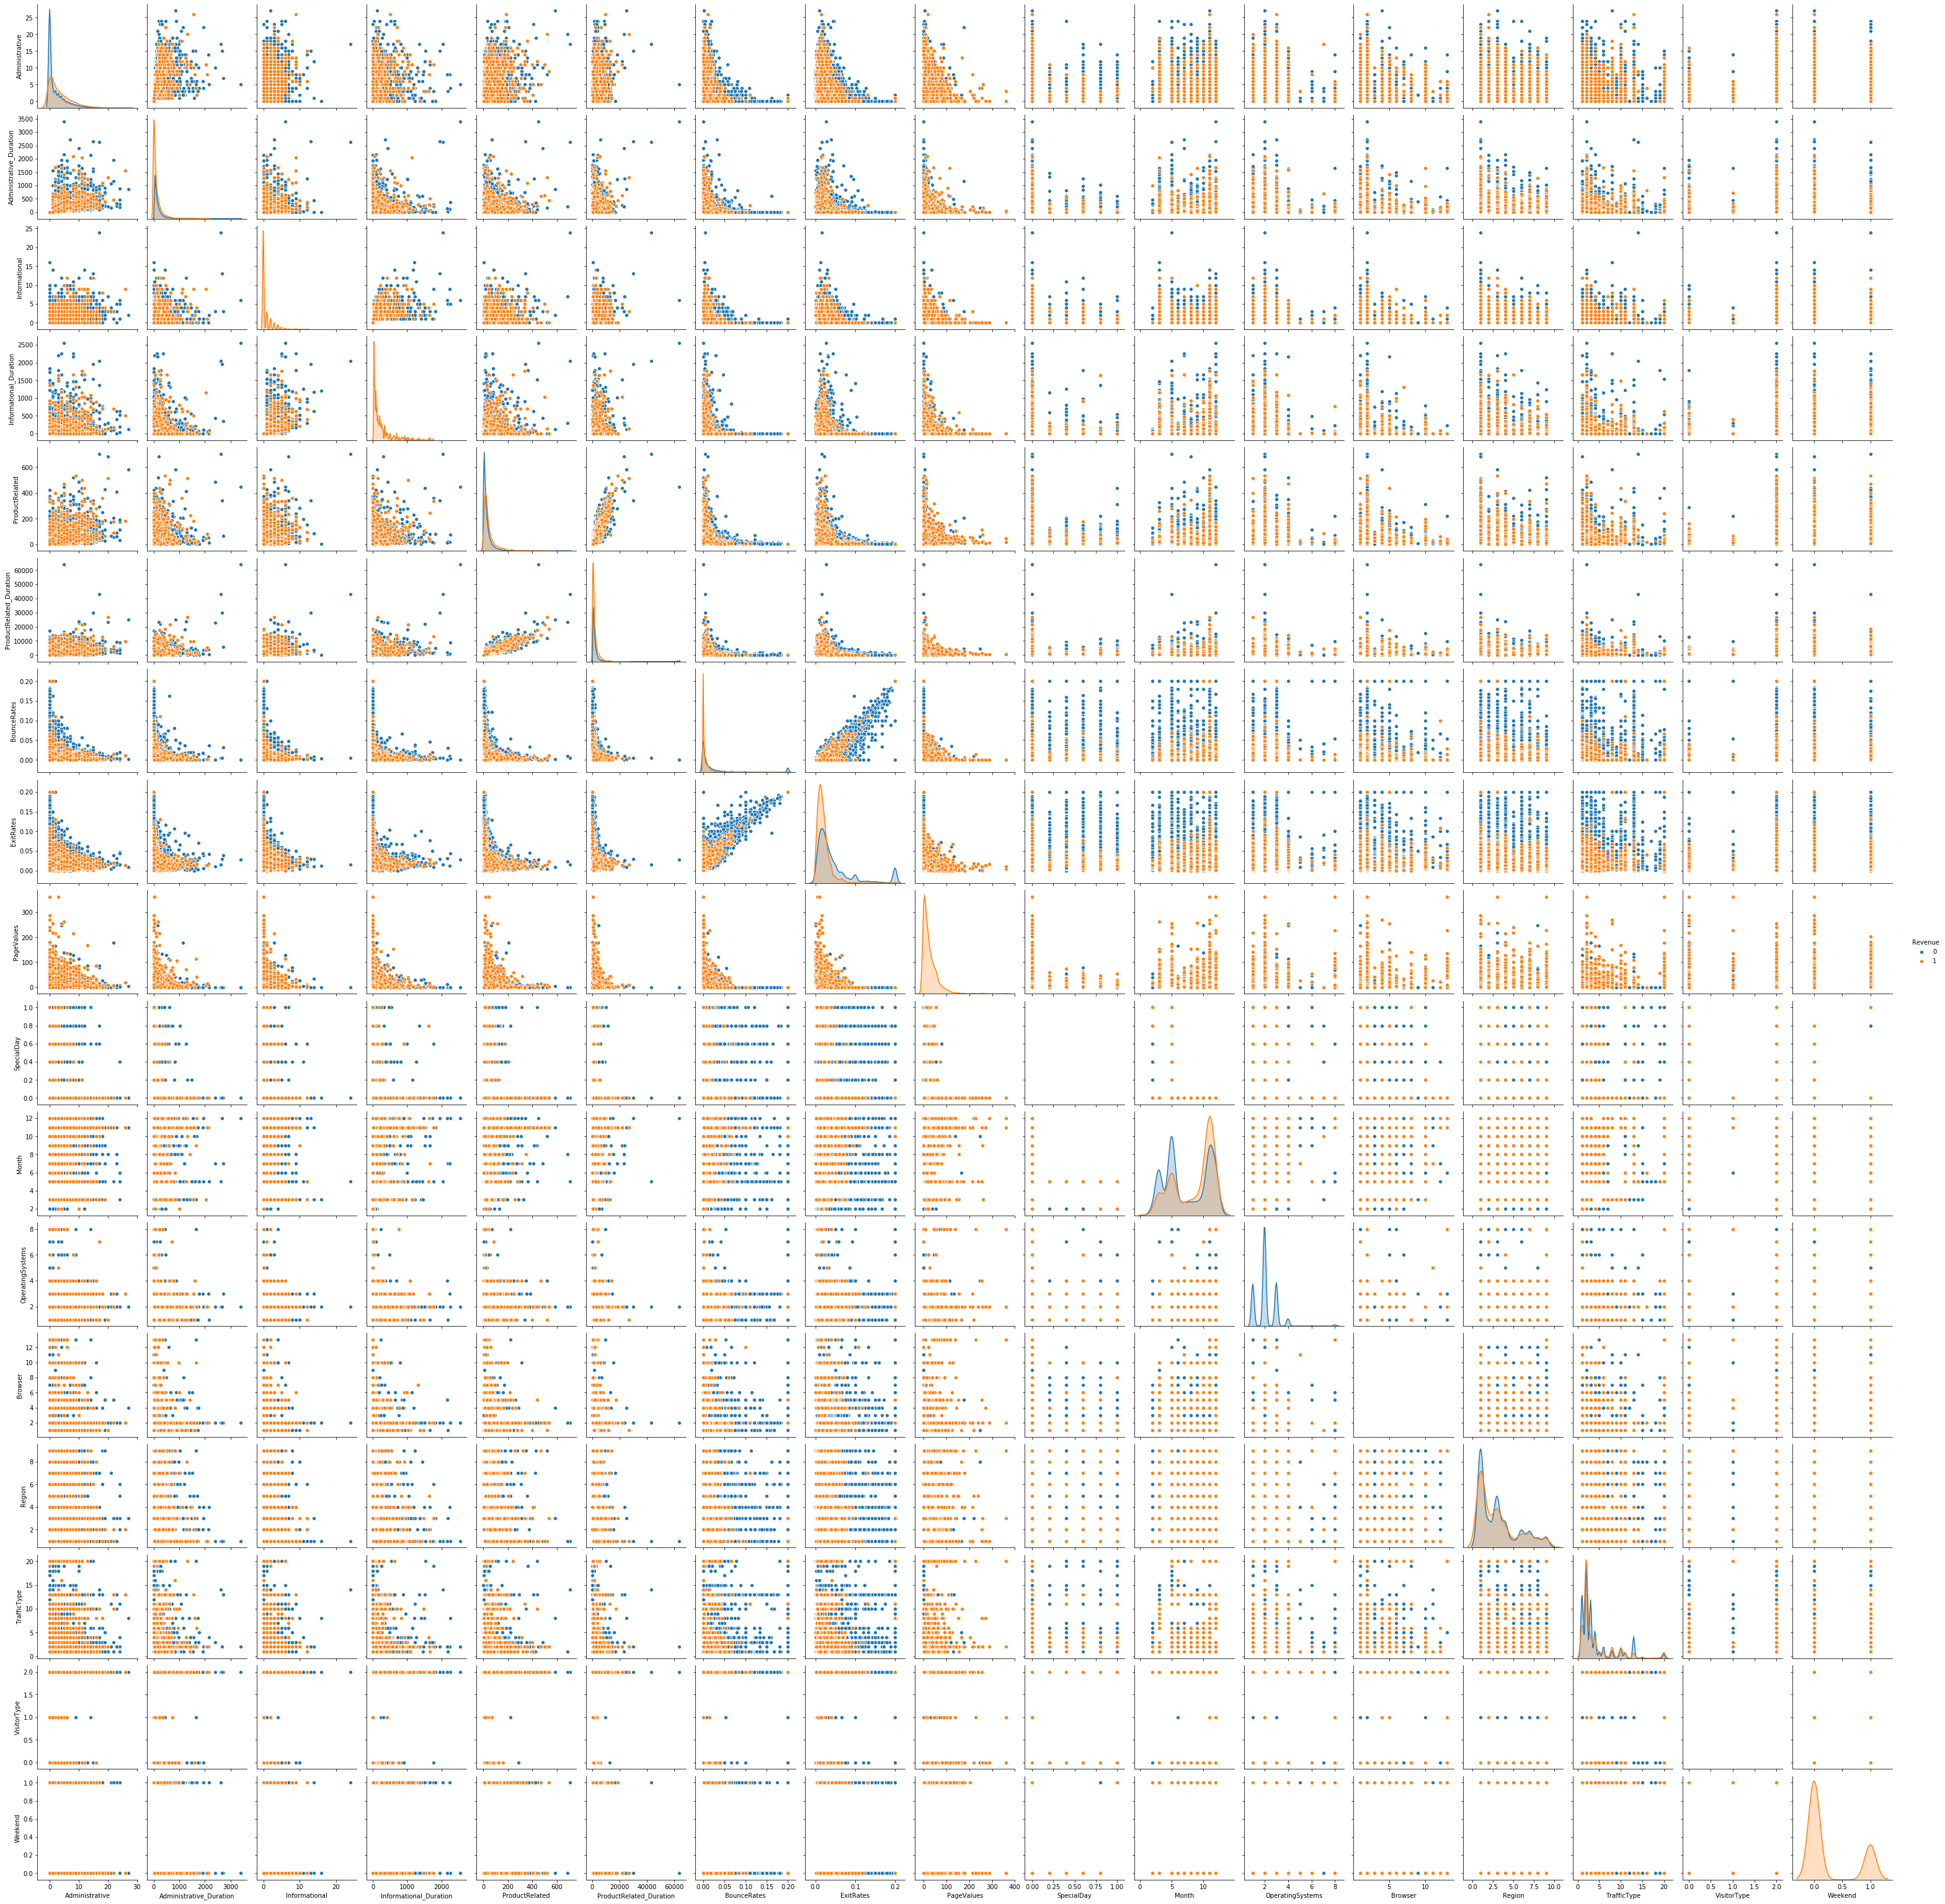

In [10]:
online_pp = sns.pairplot(online_df, hue = 'Revenue');
online_pp.savefig("../img/online_shopping_pairplot.png")

**Observations:**
* Along the diagonal, we're looking for features that exhibit clearly distinct densities accross different values of the target variable. This is particularly apparent with respect to "PageValues" and somewhat evident in "Month" and "ExitRates."  
* Elsewhere, we're looking for pairs of features that define clear separation between our classes.  This can be seen in the clear clustering of the positive class where "ExitRates" are plotted against "BounceRates."  
* Let's take a look at a 3-D scatter considering the three features that define the most prominent separation and see what we get.

In [11]:
fig = px.scatter_3d(online_df, x='ExitRates', 
                    y='BounceRates', 
                    z='PageValues', 
                    color='Revenue', 
                    opacity=.5, 
                    color_continuous_scale=["blue", "orange"])

fig.update(layout_coloraxis_showscale=False)
fig.show()

## Feature Correlations (Heatmap)

Let's look at how the input features (and target) correlate.

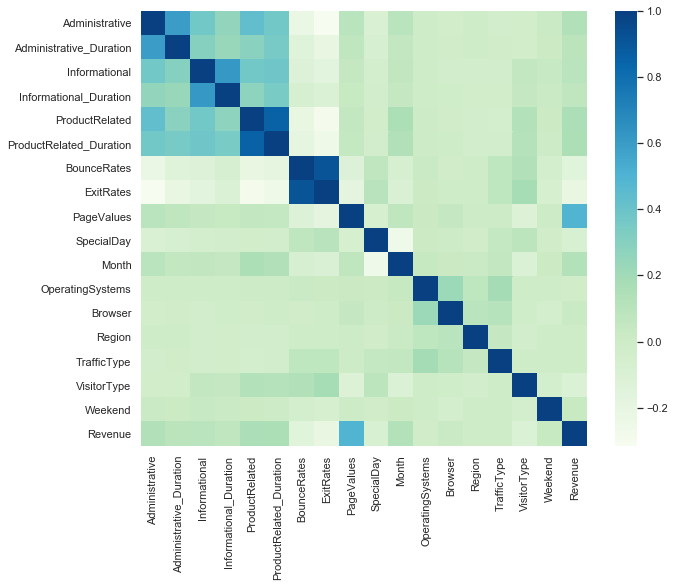

In [12]:
sns.set(rc={'figure.figsize':(10,8)})
sns.heatmap(online_df.corr(), cmap = 'GnBu');

## Target Variable Prevelance

In [13]:
online_df.Revenue.value_counts()

0    10422
1     1908
Name: Revenue, dtype: int64

In [14]:
print(f'{sum(online_df.Revenue) / len(online_df):.2%} prevelance of positive class (purchase made)')

15.47% prevelance of positive class (purchase made)


**Let's look at how each of the feature variables distribute by class.**

In [15]:
for column in online_df.columns:
    print(column)
    display(online_df.groupby('Revenue')[column].describe().reset_index())
    print(('#' * 75) + '\n\n')

Administrative


Revenue    count      mean       std  min  25%  50%  75%   max
0        0  10422.0  2.117732  3.202481  0.0  0.0  0.0  3.0  27.0
1        1   1908.0  3.393606  3.730527  0.0  0.0  2.0  5.0  26.0

###########################################################################


Administrative_Duration


Revenue    count        mean         std  min  25%        50%         75%  \
0        0  10422.0   73.740111  171.017970  0.0  0.0   0.000000   83.000000   
1        1   1908.0  119.483244  201.114732  0.0  0.0  52.366667  151.083333   

       max  
0  3398.75  
1  2086.75

###########################################################################


Informational


Revenue    count      mean       std  min  25%  50%  75%   max
0        0  10422.0  0.451833  1.211582  0.0  0.0  0.0  0.0  24.0
1        1   1908.0  0.786164  1.521176  0.0  0.0  0.0  1.0  12.0

###########################################################################


Informational_Duration


Revenue    count       mean         std  min  25%  50%   75%          max
0        0  10422.0  30.236237  133.909306  0.0  0.0  0.0   0.0  2549.375000
1        1   1908.0  57.611427  171.619131  0.0  0.0  0.0  19.0  1767.666667

###########################################################################


ProductRelated


Revenue    count       mean        std  min   25%   50%   75%    max
0        0  10422.0  28.714642  40.744717  0.0   6.0  16.0  35.0  705.0
1        1   1908.0  48.210168  58.267365  0.0  15.0  29.0  57.0  534.0

###########################################################################


ProductRelated_Duration


Revenue    count         mean          std  min        25%         50%  \
0        0  10422.0  1069.987809  1803.797757  0.0  151.00000   510.19000   
1        1   1908.0  1876.209615  2312.214392  0.0  541.90625  1109.90625   

           75%          max  
0  1331.816667  63973.52223  
1  2266.011310  27009.85943

###########################################################################


BounceRates


Revenue    count      mean       std  min  25%       50%       75%  max
0        0  10422.0  0.025317  0.051877  0.0  0.0  0.004255  0.020000  0.2
1        1   1908.0  0.005117  0.012185  0.0  0.0  0.000000  0.006452  0.2

###########################################################################


ExitRates


Revenue    count      mean       std  min       25%       50%       75%  \
0        0  10422.0  0.047378  0.051231  0.0  0.015560  0.028571  0.053846   
1        1   1908.0  0.019555  0.016463  0.0  0.009521  0.016000  0.025000   

   max  
0  0.2  
1  0.2

###########################################################################


PageValues


Revenue    count       mean        std  min       25%        50%  \
0        0  10422.0   1.975998   9.072424  0.0  0.000000   0.000000   
1        1   1908.0  27.264518  35.191954  0.0  3.641144  16.758134   

         75%         max  
0   0.000000  246.758590  
1  38.897742  361.763742

###########################################################################


SpecialDay


Revenue    count      mean       std  min  25%  50%  75%  max
0        0  10422.0  0.068432  0.209054  0.0  0.0  0.0  0.0  1.0
1        1   1908.0  0.023166  0.123521  0.0  0.0  0.0  0.0  1.0

###########################################################################


Month


Revenue    count      mean       std  min  25%   50%   75%   max
0        0  10422.0  7.467089  3.410897  2.0  5.0   7.0  11.0  12.0
1        1   1908.0  8.661950  3.104622  2.0  5.0  11.0  11.0  12.0

###########################################################################


OperatingSystems


Revenue    count      mean       std  min  25%  50%  75%  max
0        0  10422.0  2.129726  0.907835  1.0  2.0  2.0  3.0  8.0
1        1   1908.0  2.092767  0.929779  1.0  2.0  2.0  2.0  8.0

###########################################################################


Browser


Revenue    count      mean       std  min  25%  50%  75%   max
0        0  10422.0  2.339474  1.681790  1.0  2.0  2.0  2.0  13.0
1        1   1908.0  2.453354  1.897042  1.0  2.0  2.0  2.0  13.0

###########################################################################


Region


Revenue    count      mean       std  min  25%  50%  75%  max
0        0  10422.0  3.159278  2.400493  1.0  1.0  3.0  4.0  9.0
1        1   1908.0  3.082285  2.407173  1.0  1.0  2.0  4.0  9.0

###########################################################################


TrafficType


Revenue    count      mean      std  min  25%  50%  75%   max
0        0  10422.0  4.078392  4.03222  1.0  2.0  2.0  4.0  20.0
1        1   1908.0  4.021488  3.98714  1.0  2.0  2.0  4.0  20.0

###########################################################################


VisitorType


Revenue    count      mean       std  min  25%  50%  75%  max
0        0  10422.0  1.749280  0.657267  0.0  2.0  2.0  2.0  2.0
1        1   1908.0  1.549266  0.830832  0.0  2.0  2.0  2.0  2.0

###########################################################################


Weekend


Revenue    count      mean       std  min  25%  50%  75%  max
0        0  10422.0  0.227308  0.419113  0.0  0.0  0.0  0.0  1.0
1        1   1908.0  0.261530  0.439583  0.0  0.0  0.0  1.0  1.0

###########################################################################


Revenue


Revenue    count  mean  std  min  25%  50%  75%  max
0        0  10422.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
1        1   1908.0   1.0  0.0  1.0  1.0  1.0  1.0  1.0

###########################################################################




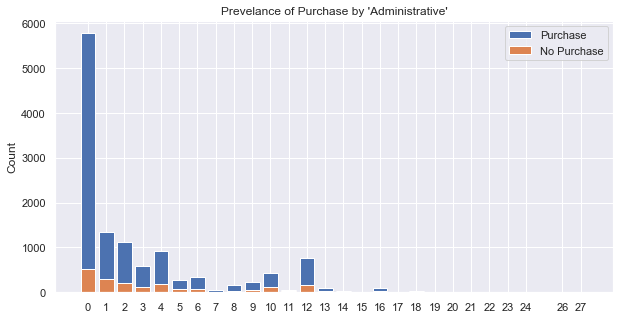

In [16]:
plot_prevelance('Administrative')

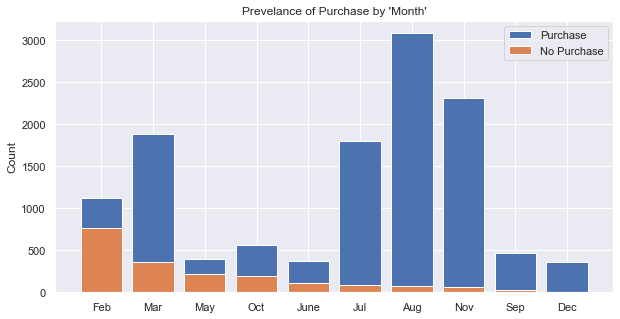

In [17]:
plot_prevelance('Month')

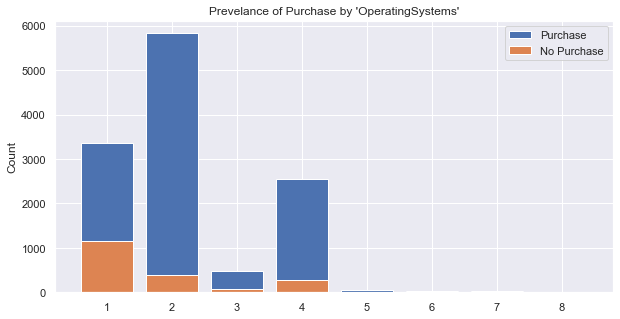

In [18]:
plot_prevelance('OperatingSystems')

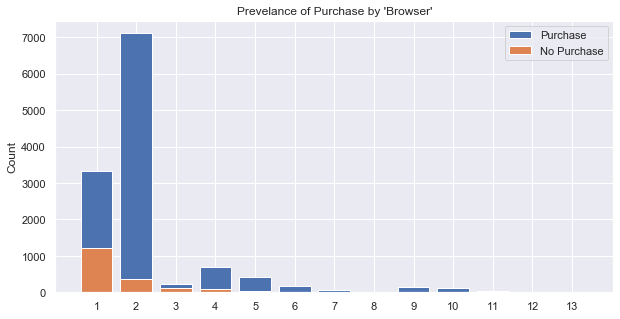

In [19]:
plot_prevelance('Browser')

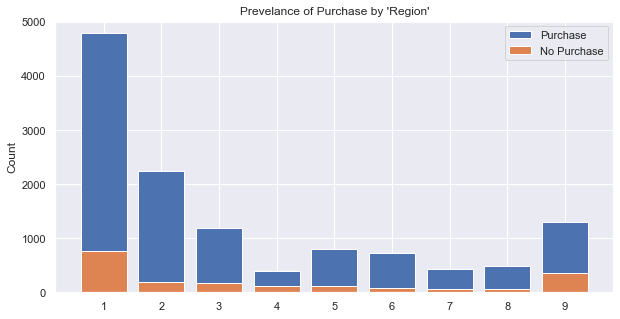

In [20]:
plot_prevelance('Region')

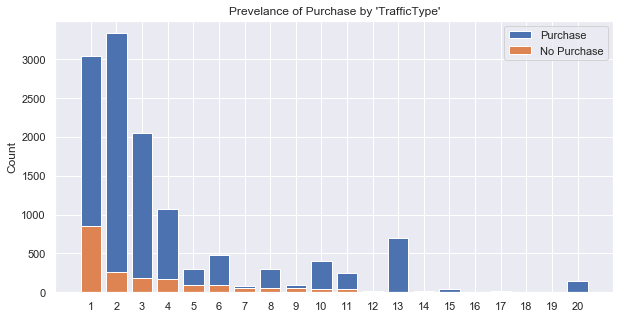

In [21]:
plot_prevelance('TrafficType')

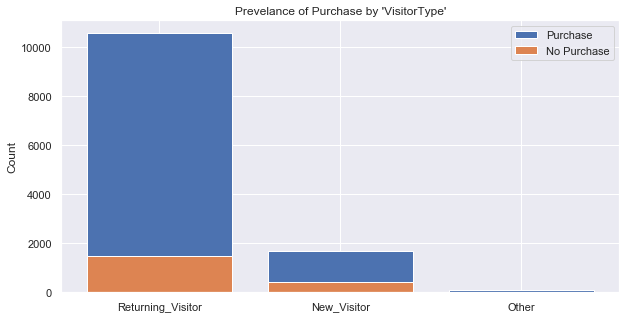

In [22]:
plot_prevelance('VisitorType')

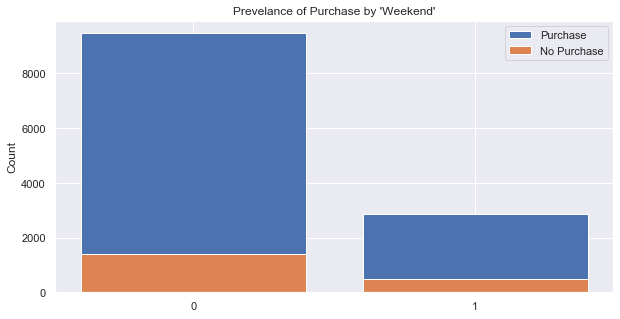

In [23]:
plot_prevelance('Weekend')

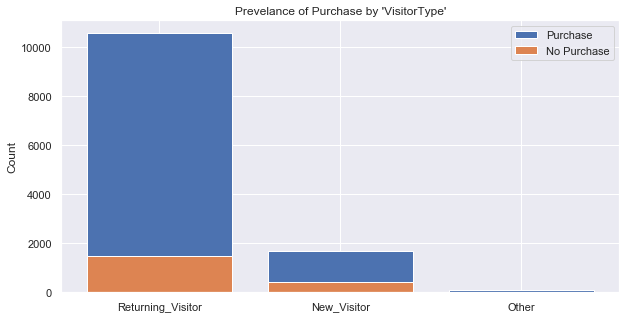

In [24]:
plot_prevelance('VisitorType')

 # Feature Engineering

Based on correlation heatmaps, we see that certain elements are highly (if not perfectly) correlated with each other.  
For instance, 
* "BounceRates" and "ExitRates" are nearly perfectly correlated, and 
* The amount of time spend viewing a certain page type is very highly correlated with the number of pages viewed of that type.  

Let's clean things up a bit by creating features that capture the page view information without multicollinearity...in particular, let's see what happens when we create features for the percentage of page views dedicated to each page type. We'll do this for duration as well and consider dropping redundant information later, as needed/applicable.

In [25]:
# Calculate total pages viewed and use as denomenator for each page type to determine percentages
online_df['tot_pages'] = (online_df.Administrative + 
                          online_df.Informational + 
                          online_df.ProductRelated)

online_df['pct_admin'] = online_df.Administrative / online_df.tot_pages
online_df['pct_info'] = online_df.Informational / online_df.tot_pages
online_df['pct_prod'] = online_df.ProductRelated / online_df.tot_pages

In [26]:
# As above, with respect to total duration
online_df['tot_duration'] = (online_df.Administrative_Duration + 
                             online_df.Informational_Duration + 
                             online_df.ProductRelated_Duration)

online_df['pct_admin_dur'] = online_df.Administrative_Duration / online_df.tot_duration
online_df['pct_info_dur'] = online_df.Informational_Duration / online_df.tot_duration
online_df['pct_prod_dur'] = online_df.ProductRelated_Duration / online_df.tot_duration

In [27]:
# May also be worth considering averge page value across all pages viewed
online_df['avg_page_value'] = online_df.PageValues / online_df.tot_pages

**This is also a good time to one-hot encode categorical features.**

In [28]:
online_df = pd.get_dummies(online_df, columns=['OperatingSystems', 
                                               'Browser', 
                                               'Region', 
                                               'TrafficType', 
                                               'VisitorType'], drop_first=True)

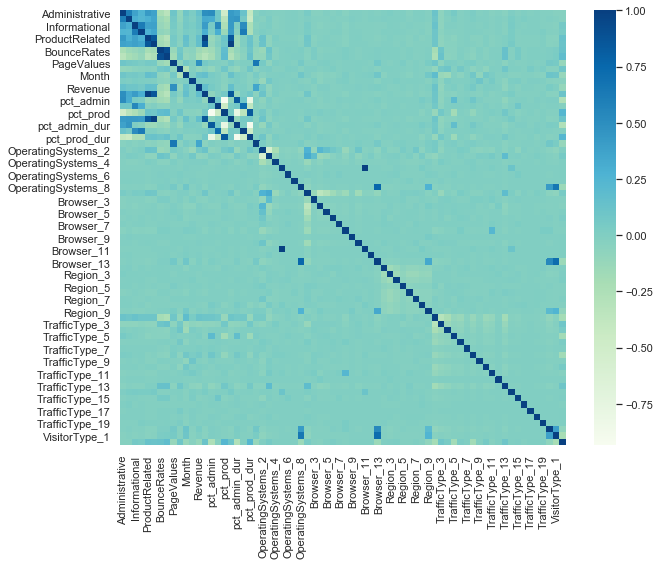

In [29]:
sns.set(rc={'figure.figsize':(10, 8)})
sns.heatmap(online_df.corr(), cmap = 'GnBu');

Based on previous heatmap, we see certain features are highly correlated. Let's eliminate highly correlated raw features in lieu of our newly engineered features based on same information.

In [30]:
online_df = online_df.fillna(0)
online_df = (online_df.drop(['Administrative', 'Administrative_Duration', 
                             'Informational', 'Informational_Duration',
                             'ProductRelated', 'ProductRelated_Duration', 
                             'ExitRates'], axis = 1))

Let's take another look at correlations after incorporating certain transformations and a few additional features. 

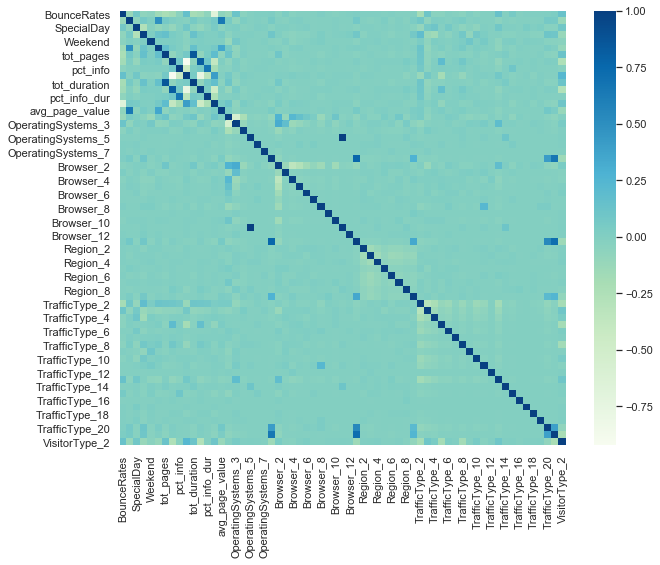

In [31]:
sns.set(rc={'figure.figsize':(10, 8)})
sns.heatmap(online_df.corr(), cmap = 'GnBu');

There appears to be a single browser that correlates perfectly with a certain operating system. Let's eliminate one of the redundant features.

In [32]:
online_df = online_df.drop(['OperatingSystems_5', 'OperatingSystems_8'], axis = 1)

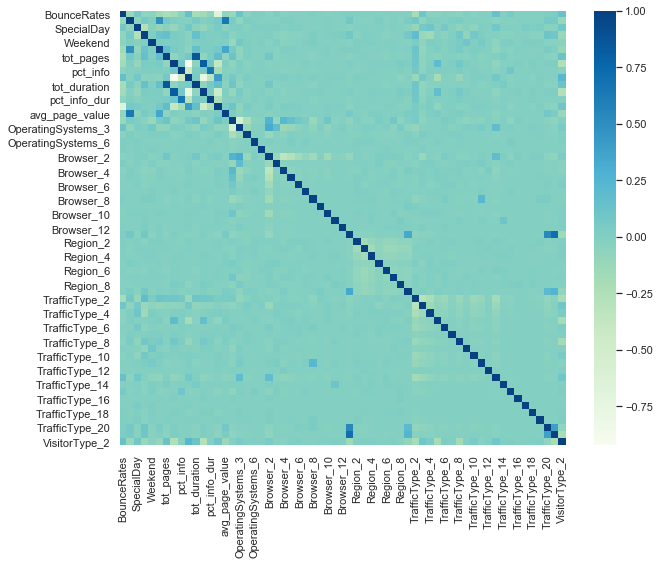

In [33]:
sns.set(rc={'figure.figsize':(10,8)})
sns.heatmap(online_df.corr(), cmap = 'GnBu');

# Export Data for Modeling

In [35]:
online_df.to_csv(r'../data/processed/online_shopping_for_models.csv', index = None)